In [19]:
import numpy as np
import random
import math
from typing import Tuple, Dict

In [20]:
def generate_state() -> int:
    return random.randint(0,63)

def index_to_cartesian(i: int, j: int) -> Tuple[float, float]:
    a = 1
    x = a * i + a / 2 * j
    y = math.sqrt(3) * a / 2 * j
    return x, y

def add_indices(indices1: Tuple[int,...], indices2: Tuple[int,...]) -> Tuple[int,...]:
    return tuple(x + y for x, y in zip(indices1, indices2))

bit_to_neighbor = {
    1: (1,0),
    2: (0,1),
    4: (-1,1),
    8: (-1,-0),
    16: (0,-1),
    32: (1,-1),
}

scattering_rules = {
    0b001001: (0b100100, 0b010010),
    0b010010: (0b001001, 0b100100),
    0b100100: (0b001001, 0b010010),
    0b010101: (0b101010,),
    0b101010: (0b010101,)
}

reflective_rules = {
    1: 8,
    2: 16,
    4: 32,
    8: 1,
    16: 2,
    32: 4
}

def generate_lattice(max_x: int, max_y: int):
    lattice = {}
    origin_site = (0,0)
    unexpanded_sites = set([origin_site])
    discovered_sites = set([origin_site])

    while unexpanded_sites:
        site = unexpanded_sites.pop()
        lattice[site] = generate_state()
        new_sites = [add_indices((x,y),site) for x,y in bit_to_neighbor.values()]
        for new_site in new_sites:
            x, y = index_to_cartesian(*new_site)
            if new_site not in discovered_sites and \
                    abs(x) <= max_x and abs(y) <= max_y:
                unexpanded_sites.add(new_site)
            discovered_sites.add(new_site)
    return lattice

def update_lattice(lattice: Dict[Tuple[int,int], int]) -> Dict[Tuple[int,int], int]:
    new_lattice = {key: 0 for key in lattice.keys()}
    for site, value in lattice.items():
        if value in scattering_rules:
            value = random.choice(scattering_rules[value])
        for bit, neighbor in bit_to_neighbor.items():
            if value & bit:
                new_site = add_indices(site, neighbor)
                if new_site not in lattice:
                    bit = reflective_rules[bit]
                    new_site = site
                new_lattice[new_site] |= bit
    return new_lattice

In [21]:
lattice = generate_lattice(2,2)
lattice_coords = np.array([index_to_cartesian(i,j) for i,j in lattice.keys()])

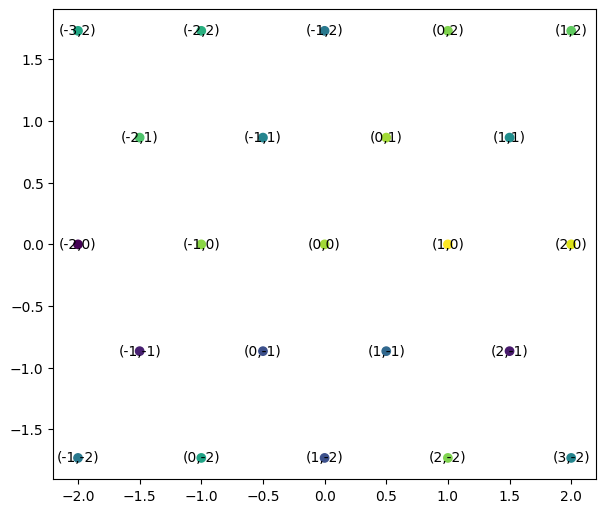

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(lattice_coords[:,0], lattice_coords[:,1], c=lattice.values(), cmap="viridis")

print_indices = True
if print_indices:
    # Add index labels at each lattice site
    for (i, j), (x, y) in zip(lattice.keys(), lattice_coords):
        plt.text(x, y, f"({i},{j})", fontsize=10, ha='center', va='center', color="black")

plt.gca().set_aspect('equal')
plt.show()

In [ ]:
lattice = generate_lattice(10,10)
lattice = {site: value if value in [1,2,4,8,16,32] else 0 for site, value in lattice.items()}
lattice_list = [lattice]
N = 100
for i in range(N):
    lattice = update_lattice(lattice)
    lattice_list.append(lattice)
lattice_list = lattice_list

C:\Users\sacka\AppData\Local\Temp\ipykernel_30888\570810731.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(lattice_coords[:,0], lattice_coords[:,1], cmap="viridis", s=1)
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to f

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


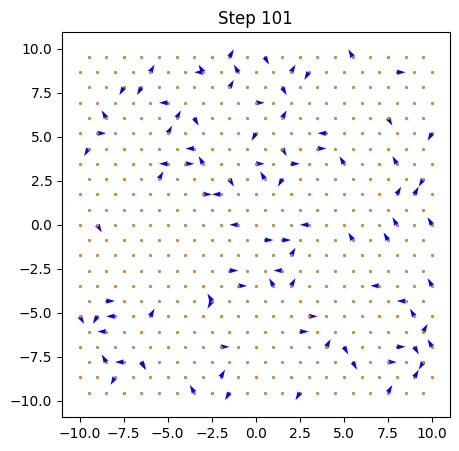

In [28]:
import numpy as np
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from IPython.display import HTML

angles = np.array([0, np.pi/3, 2*np.pi/3, np.pi, -2*np.pi/3, -np.pi/3])
arrow_length = 0.5

fig, ax = plt.subplots(figsize=(5,5))
ax.axis('equal')

# Keep a list of quiver objects
quivers = []

def init():
    """Initialize quivers for the first frame"""
    global quivers
    lattice = lattice_list[0]
    lattice_coords = np.array([index_to_cartesian(i,j) for i,j in lattice.keys()])
    plt.scatter(lattice_coords[:,0], lattice_coords[:,1], cmap="viridis", s=1)

    for site, value in lattice.items():
        x, y = index_to_cartesian(*site)
        for k in range(6):
            if (value >> k) & 1:
                angle = angles[k]
                q = ax.quiver(x, y, arrow_length*np.cos(angle), arrow_length*np.sin(angle),
                              angles='xy', scale_units='xy', scale=1, color='blue', width=0.005)
                quivers.append(q)
    ax.set_xlim(-10-1, 10+1)
    ax.set_ylim(-10-1, 10+1)
    return quivers

def update(frame):
    """Update arrows for each frame"""
    # Remove previous quivers
    for q in quivers:
        q.remove()
    quivers.clear()
    
    lattice = lattice_list[frame]
    for site, value in lattice.items():
        x, y = index_to_cartesian(*site)
        for k in range(6):
            if (value >> k) & 1:
                angle = angles[k]
                q = ax.quiver(x, y, arrow_length*np.cos(angle), arrow_length*np.sin(angle),
                              angles='xy', scale_units='xy', scale=1, color='blue', width=0.005)
                quivers.append(q)
    ax.set_title(f"Step {frame+1}")
    ax.set_xlim(-10-1, 10+1)
    ax.set_ylim(-10-1, 10+1)
    return quivers

anim = FuncAnimation(fig, update, frames=len(lattice_list), init_func=init, interval=500, blit=False)

# Display animation in Jupyter Notebook
HTML(anim.to_jshtml())